# Collection of Data:

# Data Collection and Preparation

In [1]:
!pip install IPython

The data collected for this project is provided by Kaggle and thorough
preparation of this data were done for machine learning models.

In [2]:
#Importing all necessary programs
def import_study_libs():
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import sklearn as sk
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import plot_tree
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import make_scorer
    import lime as lime
    import shap as shap
    from IPython.display import Image
    return {"np": np, "pd": pd, "sns": sns, "plt": plt, "train_test_split": train_test_split, "GridSearchCV": GridSearchCV, "StratifiedKFold": StratifiedKFold,
            "DecisionTreeClassifier": DecisionTreeClassifier, "plot_tree": plot_tree, "accuracy_score": accuracy_score, "confusion_matrix": confusion_matrix,
            "classification_report":classification_report, "make_scorer": make_scorer, "lime": lime, "shap": shap, "Image": Image}

# Loading the data set
file= "student_habits_performance.csv"
def load_study_data():
    try:
        libs= import_study_libs()
        pd= libs["pd"]
        df= pd.read_csv(file, sep=';')
        df.columns=df.columns.str.strip() #To clean up data
        print ("Data Loaded Succesfully!")
        return df
    except FileNotFoundError:
        print (f"File not found!: {file}")
        return None


## Preparation of Data:

Data is prepped by removing missing values, selecting the age range,
encoding categorical values and normalising numeric variables.

In [3]:
# Handle missing Values and duplicates:
def study_clean():
    df = load_study_data()
    if df is None:
        return None  # Exit early if loading failed

    libs = import_study_libs()
    pd = libs["pd"]
    np = libs["np"]

    print(f"Data size:\n{df.head()}\n")
    print(f"Data shape: {df.shape}\n")
    print(f"Data Statistics:\n{df.describe()}\n")

    df_missing = df.fillna(df.mean(numeric_only=True))
    df_duplicates = df_missing.drop_duplicates()

    df_clean = df_duplicates[
        (df_duplicates["sleep_hours"] + df_duplicates["social_media_hours"] +
         df_duplicates["netflix_hours"] + df_duplicates["study_hours_per_day"] <= 24) &
        (df_duplicates["sleep_hours"] >= 0) &
        (df_duplicates["age"].between(16, 24))
    ]

    print("Data preprocessed and cleaned!")
    return df_clean


# Data Exploration and Model Building

## Statistical Analysis:

The data was first explored by applied statistical in three ways:

-   Mean study time by Health Tier

-   Correlation between sleep and exam scores

-   Outlier detection

In [4]:
# Statistical Analysis
def stats():
    data= study_clean()
    df=data["df_clean"]
    #Get data statistical analysis after cleaning
    return data.columns, data.describe()


## Data Exploration:

Data were explored and the following plots were obtained:

-   Scatter plot

    -   The correlation between exam score and internet quality, sleep
        hours and exercise frequency

-   Stacked bar plot

    -   The difference in categories between the following age groups:
        16-18 years, 19-20 years, 21-22 years and 23-24 years.

-   Box/Violin plots

    -   Mental Health rating per age group: 16-18 years, 19-20 years,
        21-22 years and 23-24 years.

-   Heatmaps

    -   To gain multivariate insights between categories

-   Parallel Coordinates plots

    -   

-   Radar Charts

    -   The difference in time spent between the following age groups:
        16-18 years, 19-20 years, 21-22 years and 23-24 years.

        -   Amount of study hours - study hours

        -   Amount of time spent on social media - social media hours

        -   Amount of time spent on Netflix - netflix hours

        -   Amount of time spent on sleep - sleep hours

In [5]:
def Scatterplots():
#Import libraries
    df = load_study_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    Image= libs["Image"]
#Create three scatter plots
# Scatter plot : Subplot (1) Exam score vs Internet Quality
    # Plot Style
    sns.set_style("whitegrid")
    
    # Create figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 8))  # 1 row, 3 columns
    #Extracting data and giving them variables
    x1=df["internet_quality"]
    x2=df["sleep_hours"]
    x3=df["exercise_frequency"]
    y=df["exam_score"]

    axs[0].scatter(x1, y, color='blue' )
    axs[0].set_xlabel("Internet Quality")
    axs[0].set_ylabel("Exam Score")
    axs[0].set_title("Exam Score VS Internet Quality", fontsize=12)
 
    # Subplot(2) Exam score vs Sleep
    axs[1].scatter(x2, y, color='green')
    axs[1].set_xlabel("Sleep Hours")
    axs[1].set_ylabel("Exam Score")
    axs[1].set_title("Exam Scores VS Sleep Hours", fontsize=12)
    
    # Subplot (3): Exam score vs Exercise Frequency
    axs[2].scatter(x3, y, color='orange')
    axs[2].set_xlabel("Exercise Frequency")
    axs[2].set_ylabel("Exam Score")
    axs[2].set_title("Exam Scores VS Exercise Frequency", fontsize=12)
    plt.tight_layout()
    
    fig.savefig('ExamScore_vs_Study_Habits.png') #saving plot as png
    plt.show()

In [6]:
#Stacked bar plot1: Difference in age groups
def stackedbar():
    df = load_study_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    Image= libs["Image"]

In [7]:
#Violin plot: Mental Health rating per age group: 16-18 years, 19-20 years, 21-22 years and 23-24 years
def violinplot():
    #import libraries
    df = load_study_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    pd= libs["pd"]
    Image= libs["Image"]

    #Extract data and make age groups through the use of bins
    bins = [15, 18, 20, 22, 24]
    labels = ['16-18', '19-20', '21-22', '23-24']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
    
    #create plot
    fig, axes= plt.subplots(figsize=(10,5))
    #make it a violinplot
    sns.violinplot(x= 'age_group', y='mental_health_rating', data=df, ax=axes, palette='rainbow', hue='age_group', legend=False)
    axes.set_title("Mental Health Rating Across Age Groups")
    axes.set_xlabel('Age Groups')
    axes.set_ylabel('Mental Health Rating')
    plt.tight_layout()
    
    #save figure and show
    fig.savefig('mental_health_rating_across_age_groups.png')
    plt.show()

In [8]:
#Heatmap
def heatmap():
    #import libraries
    df = load_study_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    Image= libs["Image"]

    #cleaning to prep data for the heatmap by removing categorical fields
    heatdata=df.drop(['student_id', 'gender', 'part_time_job', 'diet_quality', 'internet_quality', 'parental_education_level', 'extracurricular_participation'], axis='columns')
    
    
    #create plot
    fig, axes= plt.subplots(figsize=(10,5))
    #make it a heatmap
    sns.heatmap(heatdata.corr(), cmap='rainbow', annot= True)
    axes.set_title('Correlation Of Numeric Study Habits')
    #save and show figure
    plt.tight_layout()
    fig.savefig('Heatmap.png')
    plt.show()

In [9]:
#Parallel Coordinates plot

In [10]:
#Radar Charts

Data Loaded Succesfully!
Data Loaded Succesfully!
Data size:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair   

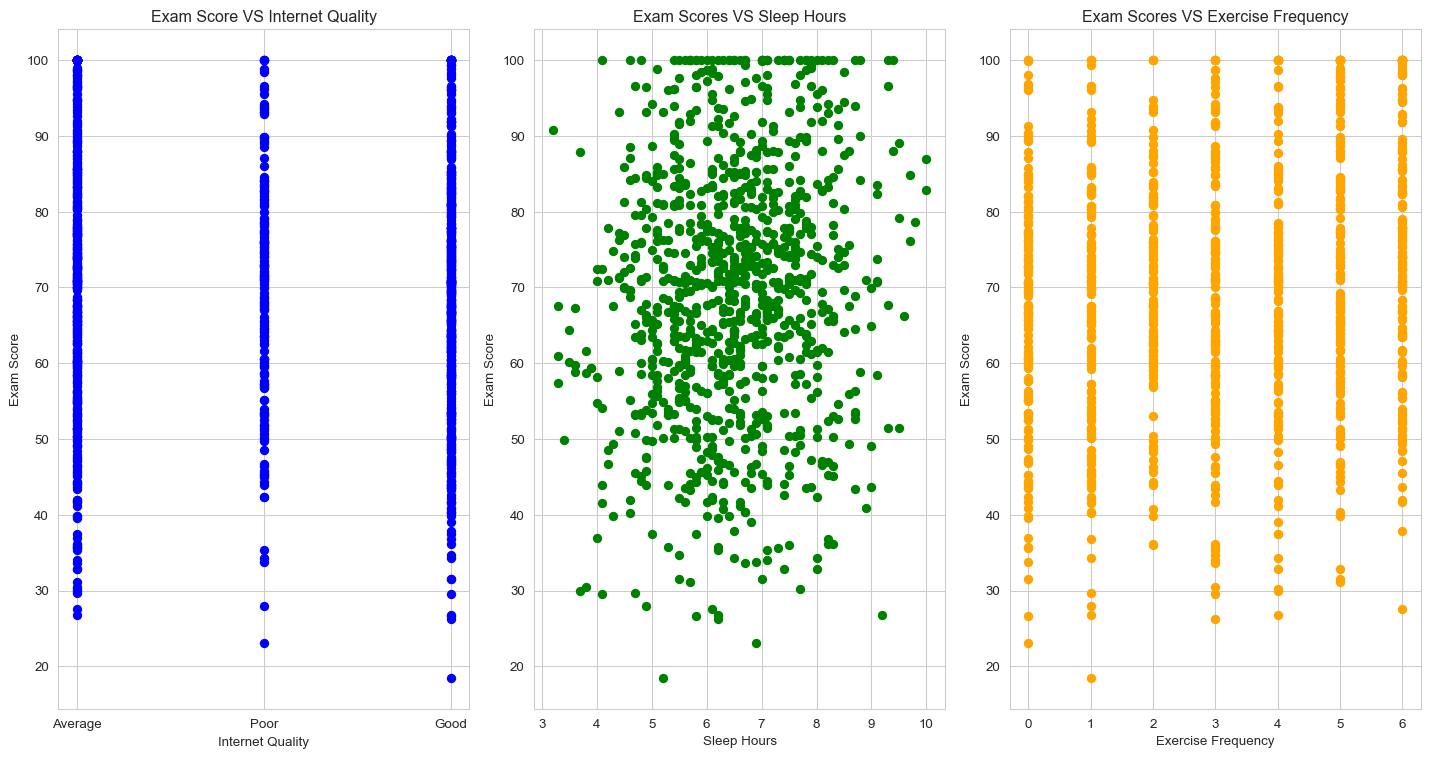

Data Loaded Succesfully!

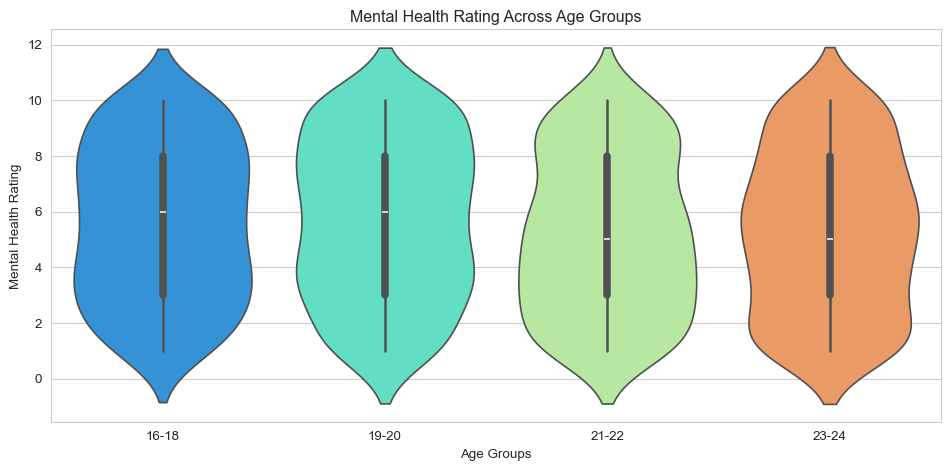

Data Loaded Succesfully!

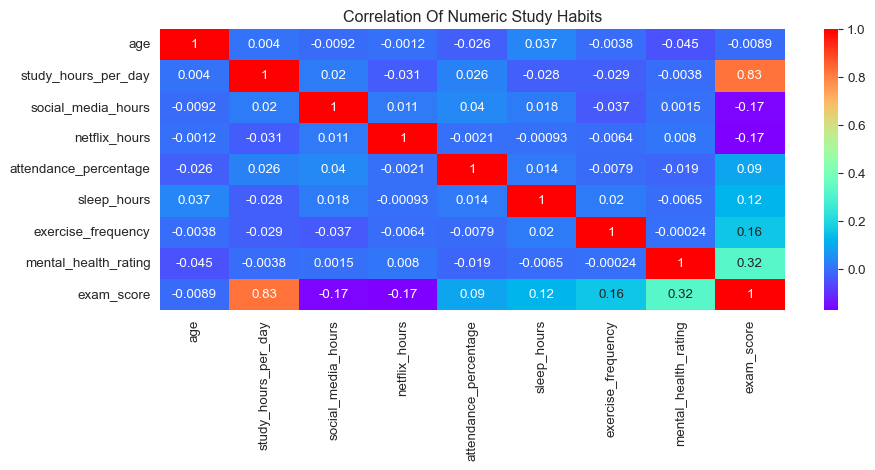

In [11]:
#calling all functions
def main():
    functions= [import_study_libs, load_study_data, study_clean, Scatterplots, violinplot, heatmap] 
    for func in functions:
        func()

if __name__== '__main__':
    main()

## Model Building:

The linear regression model and decision tree model were trained for
this project:

##### Linear Regression Model

The following categories were considered in the linear regression model:

-   Study hours
-   Sleep hours
-   Social Media hours
-   Netflix hours
-   Exercise frequency
-   Predicted Exam Score

The categories expected to be most profitable were increased to predict
the impact on exam score. These categories were: sleep hours, study
hours and exercise frequency.

##### Decision Tree

A decision tree was utilised to predict whether a student would obtain
an exam score above 75% or not.

#Note to self: Need to change the following categories:

-   part-time -\> 0 or 1 (binary class)

-   diet quality (multi-class)

-   parental education (multi-class)

-   internet quality (multi-class)

-   extracurricular activity -\> 0 or 1 (binary class)